# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely

In [2]:
# Proportion of trips on this date as compared to Avg number of trips on the same day of week in baseline period i.e 1st

In [3]:
df = pd.read_csv("covid_impact_on_airport_traffic.csv")

In [4]:
df

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-07-05,1.0,Kingsford Smith,52,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-05-28,1.0,Kingsford Smith,61,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-05-07,1.0,Kingsford Smith,62,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-06-24,1.0,Kingsford Smith,58,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
5,Daily,2020-10-16,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
6,Daily,2020-06-01,1.0,Kingsford Smith,55,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
7,Daily,2020-06-18,1.0,Kingsford Smith,59,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
8,Daily,2020-09-15,1.0,Kingsford Smith,19,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
9,Daily,2020-08-10,1.0,Kingsford Smith,19,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [5]:
countries = df.groupby(["Country"])["Country"].count().reset_index(name = "Count Country")

# Retrieve Long and Lat Coordiantes


In [6]:
def getLat(point):
    _, lat = point[6:-1].split(" ")
    return float(lat)

In [7]:
def getLong(point):
    long, _ = point[6:-1].split(" ")
    return float(long)

In [8]:
df["lat"] = df["Centroid"].map(getLat)
df["long"] = df["Centroid"].map(getLong)

In [9]:
df

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,lat,long
0,Daily,2020-07-05,1.0,Kingsford Smith,52,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
1,Daily,2020-05-28,1.0,Kingsford Smith,61,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
2,Daily,2020-05-07,1.0,Kingsford Smith,62,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
3,Daily,2020-06-24,1.0,Kingsford Smith,58,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
4,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
5,Daily,2020-10-16,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
6,Daily,2020-06-01,1.0,Kingsford Smith,55,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
7,Daily,2020-06-18,1.0,Kingsford Smith,59,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
8,Daily,2020-09-15,1.0,Kingsford Smith,19,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
9,Daily,2020-08-10,1.0,Kingsford Smith,19,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088


In [10]:
# split dataframe into USA and CA
canada = df.loc[df["Country"] == "Canada"]
usa = df.loc[df["Country"] == "United States of America (the)"]
temp = [usa, canada]
na = pd.concat(temp)

In [11]:
# cities in CA and USA
canadaCities = canada.groupby(["City"])["City"].count().reset_index(name = "Count City")
usaCities = usa.groupby(["City"])["City"].count().reset_index(name = "Count City")
naCities = na.groupby(["City"])["City"].count().reset_index(name = "Count City")

In [12]:
naCities

,City,Count City
0,Boston,214
1,Calgary,214
2,Charlotte,214
3,Chicago,214
4,College Park,215
5,Denver,214
6,Dorval,215
7,Floris,214
8,Grapevine,215
9,Halifax,205


In [13]:
rankNA = na.groupby("AirportName").mean().sort_values(by = "PercentOfBaseline")
rankCA = canada.groupby("AirportName").mean().sort_values(by = "PercentOfBaseline")
rankUSA = usa.groupby("AirportName").mean().sort_values(by = "PercentOfBaseline")

In [14]:
rankCA

,Version,PercentOfBaseline,lat,long
AirportName,,,,
Halifax International,1.0,54.351220,44.883017,-63.511672
Toronto Pearson,1.0,56.042056,43.679352,-79.631344
Edmonton International,1.0,70.370370,53.308783,-113.576261
Montreal Trudeau,1.0,71.162791,45.467844,-73.742412
Vancouver International,1.0,75.929907,49.193579,-123.177541
Montreal Mirabel,1.0,85.538095,45.681503,-74.048380
Calgary International,1.0,88.084112,51.118475,-114.013123
Hamilton International,1.0,88.816901,43.172036,-79.926693
Winnipeg International,1.0,89.658879,49.902471,-97.219062


In [15]:
# Refer to geopandas documentation: https://geopandas.org/gallery/create_geopandas_from_pandas.html
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

In [30]:
# Make 'Geometry' in NA dataframe; will have to refactor this later on (code is messy, have three cols of the same thing)
gdfna = gpd.GeoDataFrame(na, geometry = gpd.points_from_xy(na.long, na.lat))

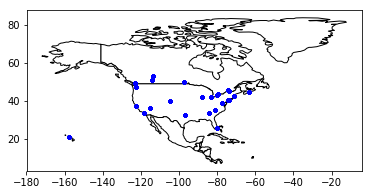

In [48]:
# Plot coordinates onto map of NA
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black')
gdfna.plot(ax = ax, color = 'blue', markersize = 10)
plt.savefig('na.svg')
#plt.show()

2294     POINT(-118.404993180627 33.941369379328)
2295     POINT(-118.404993180627 33.941369379328)
2296     POINT(-118.404993180627 33.941369379328)
2297     POINT(-118.404993180627 33.941369379328)
2298     POINT(-118.404993180627 33.941369379328)
2299     POINT(-118.404993180627 33.941369379328)
2300     POINT(-118.404993180627 33.941369379328)
2301     POINT(-118.404993180627 33.941369379328)
2302     POINT(-118.404993180627 33.941369379328)
2303     POINT(-118.404993180627 33.941369379328)
2304     POINT(-118.404993180627 33.941369379328)
2305     POINT(-118.404993180627 33.941369379328)
2306     POINT(-118.404993180627 33.941369379328)
2307     POINT(-118.404993180627 33.941369379328)
2308     POINT(-118.404993180627 33.941369379328)
2309     POINT(-118.404993180627 33.941369379328)
2310     POINT(-118.404993180627 33.941369379328)
2311     POINT(-118.404993180627 33.941369379328)
2312     POINT(-118.404993180627 33.941369379328)
2313     POINT(-118.404993180627 33.941369379328)
